In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
#datasets
movies = pd.read_csv("./data/ml-latest-small/movies.csv")
ratings = pd.read_csv("./data/ml-latest-small/ratings.csv")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.info

<bound method DataFrame.info of       movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Dra

In [5]:
print(len(ratings['movieId'].unique()))  # only 9724 unique movies in ratings list...
ratings.head(-5)

9724


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100826,610,162350,3.5,1493849971
100827,610,163937,3.5,1493848789
100828,610,163981,3.5,1493850155
100829,610,164179,5.0,1493845631


In [6]:
#clean and proper mapping of movies
movies.sort_values(by='movieId', ascending=True, inplace=True)
ratings.sort_values(by='movieId', ascending=True, inplace=True)
movies.reset_index(inplace=True, drop=False)
movies.reset_index(inplace=True, drop=False)

movie_di = dict()

for index, row in movies.iterrows():
    if row["movieId"] not in movie_di:
        movie_di[row["movieId"]] = index
        
# update rows
movies = movies.replace({"movieId": movie_di})
ratings = ratings.replace({"movieId": movie_di})

314     329
277     317
257     307
510     279
1939    278
       ... 
2116      1
6150      1
9082      1
8193      1
5493      1
Name: movieId, Length: 9724, dtype: int64
most frequent movie: Forrest Gump (1994)


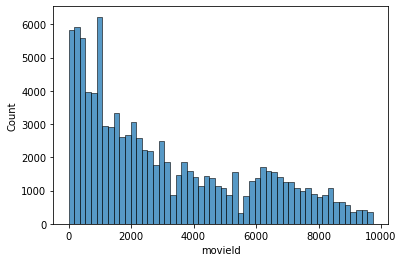

In [7]:
sns.histplot(ratings, x='movieId')
print(ratings['movieId'].value_counts().sort_values(ascending=False) )
print(f"most frequent movie: {movies['title'][314]}") # was just curious :)

In [8]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [9]:
di = movies['title'].to_dict()
di[0]

'Toy Story (1995)'

In [10]:
ratings['title'] = ratings['movieId'].apply(lambda row: di[row])
# ratings['title'] = movies['title'][ratings['movieId']]
# ratings = ratings.astype({"title": str}) # "object" is correct
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 51362
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 4.6+ MB


In [11]:
ratings.head()

,userId,movieId,rating,timestamp,title
0,1,0,4.0,964982703,Toy Story (1995)
81531,517,0,4.0,1487954343,Toy Story (1995)
30517,213,0,3.5,1316196157,Toy Story (1995)
81082,514,0,4.0,1533872400,Toy Story (1995)
30601,214,0,3.0,853937855,Toy Story (1995)


In [12]:
utility_matrix = ratings.pivot_table(index='title', columns='userId', values='rating').fillna(0)

In [36]:
# double check
print(ratings.loc[ratings['title'] == '¡Three Amigos! (1986)' ].loc[ratings['userId']==1])
print(ratings.loc[ratings['title'] == 'xXx (2002)' ].loc[ratings['userId']==608])

utility_matrix.sort_values(by='title', ascending=True).head(-5)


     userId  movieId  rating  timestamp                  title
160       1     1866     4.0  964984169  ¡Three Amigos! (1986)
       userId  movieId  rating   timestamp       title
99335     608     3920     3.5  1117507055  xXx (2002)


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zulu (2013),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[REC] (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
[REC]² (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5


In [14]:
utility_matrix.dtypes

userId
1      float64
2      float64
3      float64
4      float64
5      float64
        ...   
606    float64
607    float64
608    float64
609    float64
610    float64
Length: 610, dtype: object

In [20]:
# save
utility_matrix.to_csv('./data/user_rating_matrix.csv', index_label='userId')

In [41]:
# don't just do this...
wrong_df = pd.read_csv('./data/user_rating_matrix.csv')
wrong_df.head()

,userId,1,2,3,4,5,6,7,8,9,...,601,602,603,604,605,606,607,608,609,610
0,'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# sample code to read in pivot table 
# yay stackoverflow!
# https://stackoverflow.com/questions/55359807/save-pandas-pivot-table-to-include-index-and-columns-names

df = pd.read_csv('./data/user_rating_matrix.csv', index_col=0)
df.columns.name = df.index.name
df.index.name = 'title'
df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
